# **Implementing a Predictor from scratch**

Gabriela Elizabeth Avila Chan (2009003)


*   Problem: Regression
*   To do: Classify dinosaur species into the geological time periods.
*   Target: Geological Time Period



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV


dataset = pd.read_csv("/content/kaggle (1).csv")
dataset

,Lat,Lng,What Dinosaurs Eat,Accepted Name,Country,Cc,Diet,Early Interval,Formation,Geological Interval,Geological Time Period,Ref Author,Ref Pubyr,State,Max Ma,Min Ma
0,42.933300,123.966698,PLANT,Chaoyangsaurus youngi,China,CN,herbivore,Late Tithonian,Tuchengzi,Tithonian,Jurassic,Dong,1992,Liaoning,150.8,132.90
1,41.799999,120.733330,PLANT and ANIMAL,Protarchaeopteryx robusta,China,CN,omnivore,Late Barremian,Yixian,Barremian,Cretaceous,Ji et al.,1998,Liaoning,130.0,122.46
2,41.799999,120.733330,PLANT and ANIMAL,Caudipteryx zoui,China,CN,omnivore,Late Barremian,Yixian,Barremian,Cretaceous,Ji and Ji,1997,Liaoning,130.0,122.46
3,50.740726,-111.528732,FLESH,Gorgosaurus libratus,Canada,CA,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Matthew and Brown,1922,Alberta,83.5,70.60
4,50.737015,-111.549347,FLESH,Gorgosaurus libratus,Canada,CA,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Russell,1970,Alberta,83.5,70.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,49.183334,-98.099998,FISH,Hesperornis chowi,Canada,CA,piscivore,Early Campanian,Pierre Shale,Campanian,Cretaceous,Aotsuka and Sato,2016,Manitoba,83.5,70.60
2459,49.183334,-98.099998,FISH,Hesperornis macdonaldi,Canada,CA,piscivore,Early Campanian,Pierre Shale,Campanian,Cretaceous,Aotsuka and Sato,2016,Manitoba,83.5,70.60
2460,49.183334,-98.099998,FISH,Hesperornis macdonaldi,Canada,CA,piscivore,Early Campanian,Pierre Shale,Campanian,Cretaceous,Aotsuka and Sato,2016,Manitoba,83.5,70.60
2461,49.183334,-98.099998,FISH,Hesperornis chowi,Canada,CA,piscivore,Early Campanian,Pierre Shale,Campanian,Cretaceous,Aotsuka and Sato,2016,Manitoba,83.5,70.60


# --> Preprocess the dataset

In [ ]:
# 1. Drop the specified columns
columns_to_drop = ["Cc", "Ref Author", "Ref Pubyr"]
dataset = dataset.drop(columns=columns_to_drop)

In [ ]:
# 2. Encode categorical variables
label_encoders = {}
categorical_columns = ['What Dinosaurs Eat', 'Accepted Name', 'Country', 'Diet', 'Early Interval', 'Formation', 'Geological Interval', 'State']
for column in categorical_columns:
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])
    label_encoders[column] = le

In [ ]:
# 3. Target variable to integers
target_mapping = {'Jurassic': 0, 'Cretaceous': 1, 'Triassic': 2}
dataset['Geological Time Period'] = dataset['Geological Time Period'].map(target_mapping)

# ---> Model

In [ ]:
# 4. Split dataset
X = dataset.drop(columns=['Geological Time Period'])
y = dataset['Geological Time Period']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Standardize numerical features
numerical_columns = ['Lat', 'Lng', 'Max Ma', 'Min Ma']
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# 6. SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=target_mapping.keys())

print(f'The ccuracy is: {accuracy}')
print('\n Classification Report:')
print(classification_rep)

The ccuracy is: 1.0

 Classification Report:
              precision    recall  f1-score   support

    Jurassic       1.00      1.00      1.00       117
  Cretaceous       1.00      1.00      1.00       354
    Triassic       1.00      1.00      1.00        22

    accuracy                           1.00       493
   macro avg       1.00      1.00      1.00       493
weighted avg       1.00      1.00      1.00       493



In [ ]:
y_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 2, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,

# ---> Plot the results in a heatmap

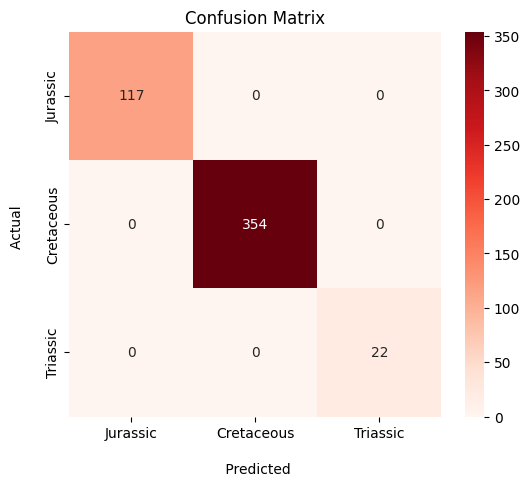

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=target_mapping.keys(), yticklabels=target_mapping.keys())
plt.xlabel('\n Predicted')
plt.ylabel('Actual \n')
plt.title('Confusion Matrix')
plt.show()

The variables 'Cc', 'Ref Author', and 'Ref Pubyr' were erased since that data was not necessary to the develop of this specific model. At the same time, the dataset was preprocessed to convert the string values from the columns to numerical values; at the same time, the columns that already had numerical values where standarized to avoid any outliers and wrong data to train the model.  

As the accuracy showed, in the heat map that was plotted, it can be noticed that each prediction was correclty calsified where it should be and therefore it shows 0 values clasified in the wrong class.